# Data Cleaning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display all columns
pd.set_option('display.max_columns', None)

## Data Import & Concat

In [2]:
# read in 2016
q1_16 = pd.read_csv('data/2016Q1.csv.gz')
q2_16 = pd.read_csv('data/2016Q2.csv.gz')
q3_16 = pd.read_csv('data/2016Q3.csv.gz')
q4_16 = pd.read_csv('data/2016Q4.csv.gz')

# read in 2017
q1_17 = pd.read_csv('data/2017Q1.csv.gz')
q2_17 = pd.read_csv('data/2017Q2.csv.gz')
q3_17 = pd.read_csv('data/2017Q3.csv.gz')
q4_17 = pd.read_csv('data/2017Q4.csv.gz')

# combine all the dfs
df = pd.concat([q1_16, q2_16, q3_16, q4_16, 
               q1_17, q2_17, q3_17, q4_17]).reset_index(drop = True)

In [3]:
df

,id,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,application_type,annual_inc_joint,dti_joint,open_act_il,open_il_24m,il_util,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths
0,73688651,4000,36 months,11.99%,132.84,Fraud analyst,8 years,RENT,45000.0,Fully Paid,debt_consolidation,853xx,AZ,0.67,0,Jul-12,744,1.0,NaN,7,1102,6.90%,9,Individual,NaN,NaN,0.0,0.0,NaN,4.0,7.0,15900,5.0,4,6398.0,14.7,0,14.0,NaN,NaN,0,9,1,7,0,1,100.0,0.0,0,1102,7500,NaN,NaN,NaN,NaN
1,75678977,7200,36 months,11.47%,237.33,Client Relations Manager,< 1 year,RENT,85000.0,Current,debt_consolidation,972xx,OR,10.17,0,Mar-04,669,2.0,35.0,6,13964,90.10%,10,Individual,NaN,NaN,2.0,0.0,58.0,2.0,68.0,15500,2.0,2,951.0,93.2,0,4.0,NaN,NaN,0,8,4,6,0,2,90.0,100.0,0,33021,14000,NaN,NaN,NaN,NaN
2,71905793,20000,36 months,16.29%,706.01,Registerd nurse,8 years,MORTGAGE,56000.0,Current,debt_consolidation,349xx,FL,33.71,0,May-05,664,0.0,39.0,21,11198,49.10%,33,Individual,NaN,NaN,7.0,1.0,83.0,11.0,73.0,22800,0.0,12,2074.0,78.6,3,14.0,NaN,NaN,0,20,12,21,0,4,96.6,75.0,2,54298,9700,NaN,NaN,NaN,NaN
3,74231221,16000,60 months,12.99%,363.97,Financial Advisor,5 years,MORTGAGE,110000.0,Current,debt_consolidation,601xx,IL,20.53,0,Aug-88,674,1.0,35.0,14,40709,78.10%,25,Individual,NaN,NaN,1.0,0.0,31.0,7.0,67.0,52100,2.0,7,1221.0,96.9,3,7.0,35.0,35.0,2,21,11,14,0,2,68.0,87.5,0,45733,39400,NaN,NaN,NaN,NaN
4,68884968,28000,60 months,15.31%,670.69,Pharmacist-in-Charge,3 years,MORTGAGE,180000.0,Current,debt_consolidation,373xx,TN,24.56,0,Aug-98,684,0.0,37.0,14,128213,96%,33,Individual,NaN,NaN,5.0,2.0,45.0,2.0,76.0,127800,2.0,5,1138.0,97.8,4,10.0,37.0,37.0,0,14,7,14,0,5,93.9,100.0,0,273107,51800,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438986,124009115,10000,60 months,24.85%,292.64,Senor System Administrator,10+ years,MORTGAGE,148000.0,Current,home_improvement,201xx,VA,4.87,2,Nov-94,669,0.0,7.0,5,4303,72.90%,9,Joint App,190000.0,3.97,0.0,0.0,NaN,2.0,73.0,5900,0.0,2,203.0,93.7,1,27.0,12.0,12.0,0,8,4,5,0,1,66.7,100.0,0,4303,3200,4939.0,669.0,Aug-05,0.0
438987,124837788,10000,60 months,17.09%,249.01,Sr consumer engagement specialist,10+ years,OWN,44700.0,Current,debt_consolidation,494xx,MI,24.13,0,Aug-00,664,0.0,34.0,12,5506,45.10%,30,Individual,NaN,NaN,2.0,0.0,49.0,6.0,48.0,12200,1.0,6,348.0,93.0,2,17.0,34.0,34.0,7,24,2,12,0,3,63.3,100.0,0,33061,5000,NaN,NaN,NaN,NaN
438988,124798499,12000,36 months,6.72%,369.00,Western Regional Manager,< 1 year,RENT,150000.0,Current,debt_consolidation,981xx,WA,9.23,1,Apr-94,674,0.0,21.0,17,18432,28%,37,Individual,NaN,NaN,1.0,1.0,76.0,3.0,33.0,65800,3.0,4,33264.0,32.9,2,23.0,56.0,21.0,5,29,9,17,1,2,88.2,0.0,0,23778,49600,NaN,NaN,NaN,NaN
438989,124992459,4000,36 months,15.05%,138.76,Senior Electrical Designer,< 1 year,MORTGAGE,93600.0,Current,other,980xx,WA,13.21,0,Nov-04,664,2.0,52.0,8,5370,70.70%,20,Joint App,171600.0,9.65,3.0,2.0,74.0,5.0,74.0,7600,7.0,8,600.0,0.0,1,156.0,57.0,52.0,1,12,2,8,0,5,75.0,0.0,0,54727,600,15879.0,654.0,Apr-97,2.0


## Descriptive Statistics

In [4]:
df.describe()

,id,funded_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,total_acc,annual_inc_joint,dti_joint,open_act_il,open_il_24m,il_util,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_inq_last_6mths
count,4.389910e+05,438991.000000,438991.000000,4.389910e+05,438706.000000,438991.000000,438991.000000,438991.000000,225315.000000,438991.000000,4.389910e+05,438991.000000,2.580900e+04,25808.00000,438964.000000,438964.000000,379426.000000,438964.000000,438917.000000,4.389910e+05,438964.000000,438991.000000,433800.000000,433602.000000,438991.000000,434089.000000,107024.000000,153405.000000,438991.000000,438991.000000,438991.000000,438991.000000,438991.000000,438991.000000,438991.000000,433774.000000,438991.000000,4.389910e+05,438991.000000,19670.000000,19671.000000,19671.000000
mean,9.724080e+07,14790.996000,443.451421,7.978605e+04,19.053124,0.343415,701.844279,0.533523,33.849042,11.746391,1.663897e+04,23.908381,1.178017e+05,19.06079,2.822894,1.580271,69.752653,2.816411,58.632459,3.479833e+04,2.088128,4.661007,11612.363034,56.734858,1.486242,24.404765,38.066181,34.772374,0.537346,13.677654,5.536617,11.698960,0.090811,2.130048,93.669153,40.881013,0.139611,5.235281e+04,23299.998446,31507.813523,669.674902,0.675258
std,1.762117e+07,9323.740928,277.262393,8.194272e+04,14.427149,0.930063,32.929589,0.830201,21.887352,5.767707,2.383450e+04,11.938711,5.790101e+04,7.45873,3.029868,1.589370,23.727198,2.609576,20.661954,3.550777e+04,2.387063,3.261466,16625.433545,28.526861,1.809667,32.595924,22.692317,22.311521,1.428550,7.987081,3.319321,5.745511,0.537118,1.884543,9.456735,36.189174,0.384764,5.106754e+04,23030.807798,25024.701622,44.342382,1.033539
min,5.571600e+04,1000.000000,6.680000,0.000000e+00,-1.000000,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,1.347000e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,544.000000,0.000000
25%,8.151795e+07,7500.000000,241.130000,4.759490e+04,12.130000,0.000000,674.000000,0.000000,15.000000,8.000000,5.815000e+03,15.000000,8.100000e+04,13.63000,1.000000,0.000000,56.000000,1.000000,45.000000,1.460000e+04,0.000000,2.000000,1900.000000,34.100000,0.000000,6.000000,20.000000,16.000000,0.000000,8.000000,3.000000,8.000000,0.000000,1.000000,90.600000,0.000000,0.000000,2.138700e+04,8400.000000,14413.000000,644.000000,0.000000
50%,9.617448e+07,12000.000000,370.910000,6.626400e+04,18.100000,0.000000,694.000000,0.000000,30.000000,11.000000,1.104000e+04,22.000000,1.070000e+05,18.71000,2.000000,1.000000,73.000000,2.000000,60.000000,2.550000e+04,1.000000,4.000000,5757.000000,58.300000,1.000000,13.000000,35.000000,31.000000,0.000000,12.000000,5.000000,11.000000,0.000000,2.000000,97.600000,33.300000,0.000000,3.874100e+04,16400.000000,25186.000000,669.000000,0.000000
75%,1.130768e+08,20000.000000,593.490000,9.500000e+04,24.800000,0.000000,719.000000,1.000000,49.000000,15.000000,1.985000e+04,30.000000,1.400000e+05,24.24000,3.000000,2.000000,86.000000,4.000000,73.000000,4.330000e+04,3.000000,6.000000,14475.250000,81.900000,2.000000,29.000000,55.000000,49.000000,0.000000,18.000000,7.000000,15.000000,0.000000,3.000000,100.000000,66.700000,0.000000,6.611400e+04,30400.000000,41353.750000,694.000000,1.000000
max,1.264193e+08,40000.000000,1719.830000,1.099920e+07,999.000000,42.000000,850.000000,5.000000,195.000000,97.000000,2.559552e+06,173.000000,1.300000e+06,69.49000,48.000000,51.000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438991 entries, 0 to 438990
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              438991 non-null  int64  
 1   funded_amnt                     438991 non-null  int64  
 2   term                            438991 non-null  object 
 3   int_rate                        438991 non-null  object 
 4   installment                     438991 non-null  float64
 5   emp_title                       408624 non-null  object 
 6   emp_length                      408978 non-null  object 
 7   home_ownership                  438991 non-null  object 
 8   annual_inc                      438991 non-null  float64
 9   loan_status                     438991 non-null  object 
 10  purpose                         438991 non-null  object 
 11  zip_code                        438991 non-null  object 
 12  addr_state      

### Converting Percent Value Columns into Numerical

In [6]:
# columns to remove % and convert to float
cols_convert = ['int_rate', 'revol_util']

# convert the int_rate, revol_util columns into type floats
for column in cols_convert:
    df[column] = df[column].str.replace('%', '').astype(float)

### Missing Values

In [7]:
# missing values percentage totals
(df.isna().mean() * 100).round(2)

id                                 0.00
funded_amnt                        0.00
term                               0.00
int_rate                           0.00
installment                        0.00
emp_title                          6.92
emp_length                         6.84
home_ownership                     0.00
annual_inc                         0.00
loan_status                        0.00
purpose                            0.00
zip_code                           0.00
addr_state                         0.00
dti                                0.06
delinq_2yrs                        0.00
earliest_cr_line                   0.00
fico_range_high                    0.00
inq_last_6mths                     0.00
mths_since_last_delinq            48.67
open_acc                           0.00
revol_bal                          0.00
revol_util                         0.08
total_acc                          0.00
application_type                   0.00
annual_inc_joint                  94.12


In [8]:
# columns with missing values 
df.columns[df.isna().any()]

Index(['emp_title', 'emp_length', 'dti', 'mths_since_last_delinq',
       'revol_util', 'annual_inc_joint', 'dti_joint', 'open_act_il',
       'open_il_24m', 'il_util', 'open_rv_24m', 'all_util', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'percent_bc_gt_75', 'revol_bal_joint', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths'],
      dtype='object')

**Notes:** 
There are several columns that contain many missing values with some containing as much as 95% missing. These appear to be related to missing information regarding joint application loans (of which the majority files individually anyways), and whether a borrower has been delinquent on payments (I believe we can assume 0 for a majority of those values).

I'll do some additional investigation on the individual features before making a decision on how to handle the missing values and imputation methods.

## Preliminary Data Visualization

### Numerical Features

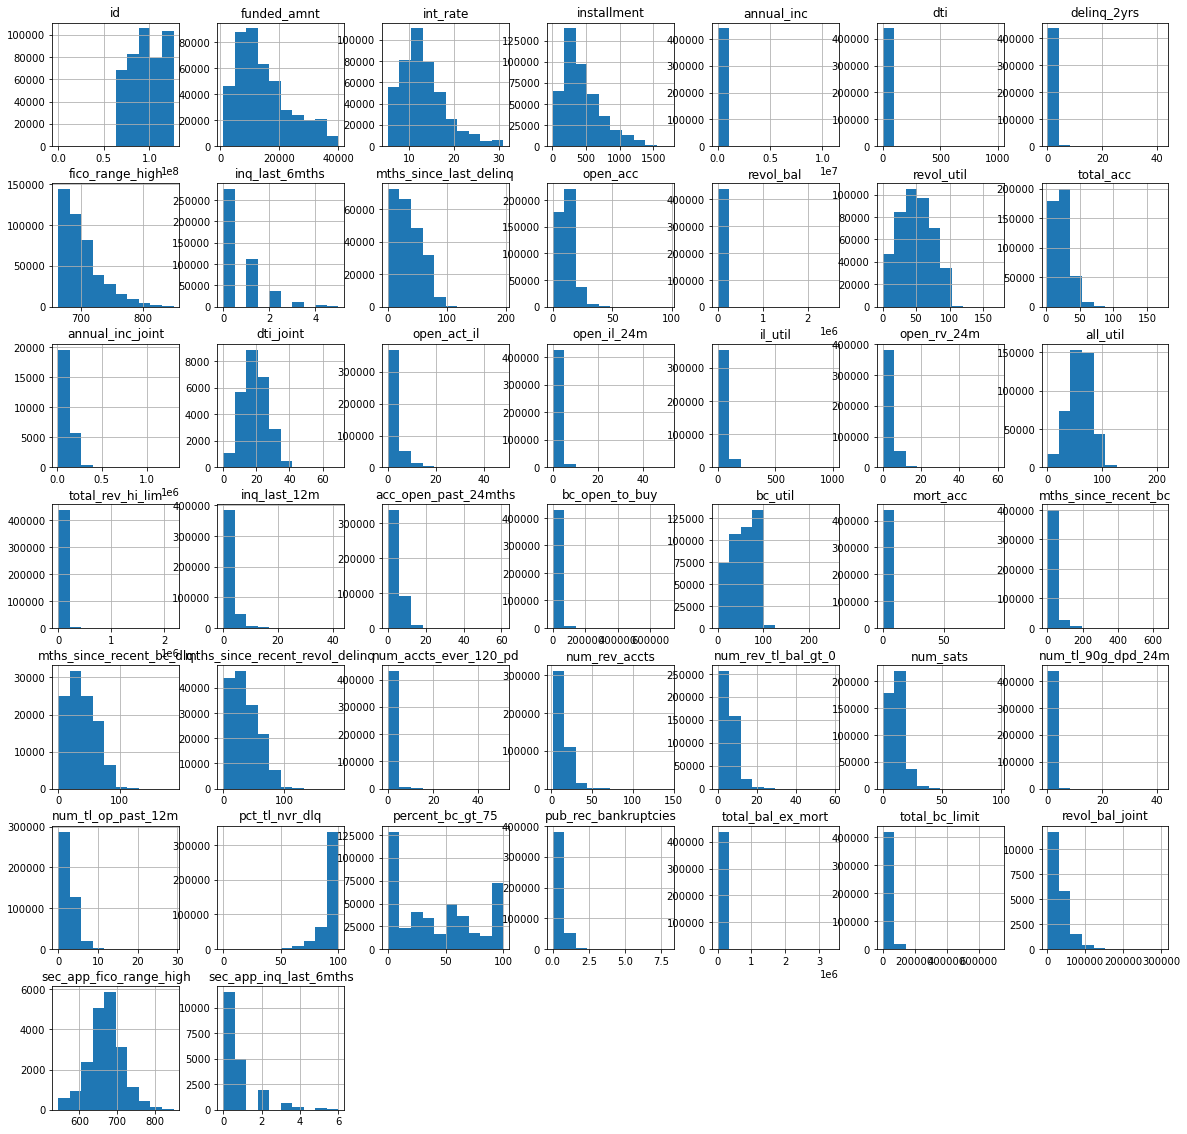

In [9]:
# for each numerical column, plot a histogram chart
df.hist(figsize = (20,20))
plt.show()

**Notes:**
- Distribution of data across features varies, but a majority have a positive skew to the right. 
- Will need to perform data standardization across the numerical features. 

### Categorical Features

I'll now take a look at the distribution of unique values for the categorical features. 

I will remove certain features like `zip_code` and `emp_title` from consideration. While this is a categorical feature, it contains way too many unique values to provide us with useful information for plotting.

In [10]:
# get the categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns

# drop zipcode (too many values)
cat_cols = cat_cols.drop('zip_code')
cat_cols

Index(['term', 'emp_title', 'emp_length', 'home_ownership', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'application_type',
       'sec_app_earliest_cr_line'],
      dtype='object')

In [11]:
# get value counts for all categorical features
value_counts_dict = {}
for column in cat_cols:
    value_counts_dict[column] = df[column].value_counts()

# Display the value counts
for column, counts in value_counts_dict.items():
    print(f"Value counts for {column}:\n{counts}\n")

Value counts for term:
 36 months    322236
 60 months    116755
Name: term, dtype: int64

Value counts for emp_title:
Teacher                              8392
Manager                              7566
Owner                                5673
Driver                               3457
Registered Nurse                     3378
                                     ... 
Banbury Operator                        1
primary nurse                           1
Federal Regulatory Coordinator          1
Scalehouse attendant                    1
Sr consumer engagement specialist       1
Name: emp_title, Length: 120032, dtype: int64

Value counts for emp_length:
10+ years    148471
2 years       39794
< 1 year      37836
3 years       35018
1 year        29239
5 years       26483
4 years       26208
6 years       18920
9 years       16068
8 years       15892
7 years       15049
Name: emp_length, dtype: int64

Value counts for home_ownership:
MORTGAGE    214298
RENT        171853
OWN          52575
A

In [12]:
# based on value counts above, drop columns for plotting (too many values)
cat_cols = cat_cols.drop(['emp_title', 'earliest_cr_line','sec_app_earliest_cr_line'])

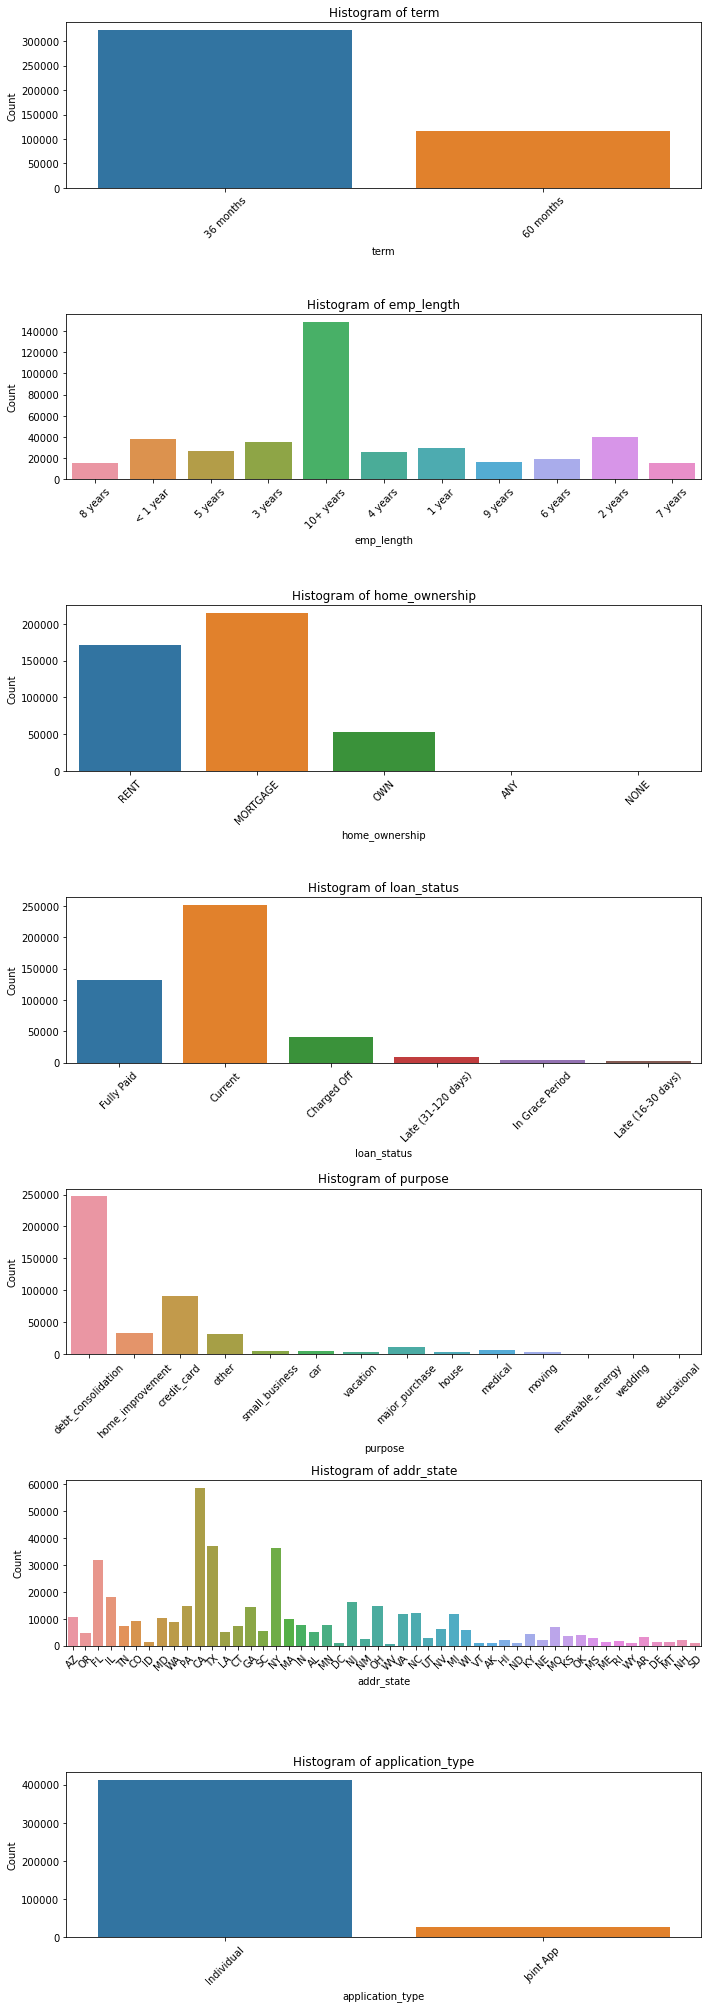

In [13]:
# Set up subplots based on the number of categorical columns
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 4 * len(cat_cols)))

# Plot histograms for each categorical column
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Notes:**
- Most loans are 36 months in length and given to individual borrowers with a lengthy employment background. Likely homeowners paying off a mortgage on their homes.
- A majority of these loans that are provided are current loans that are aimed at resolving current debt.
- Ideally, we want to **target borrowers that are able to pay off their loans on time and avoid borrowers who are late on payments**.